## Computational Assignment 2

PHY224H1S | 2020 Winter

Jeff Shen | 1004911526

31 Jan 2020

In [1]:
# imports
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

In [3]:
time, position, position_uncertainty = np.loadtxt('rocket.csv', skiprows=1, delimiter=',', unpack=True)

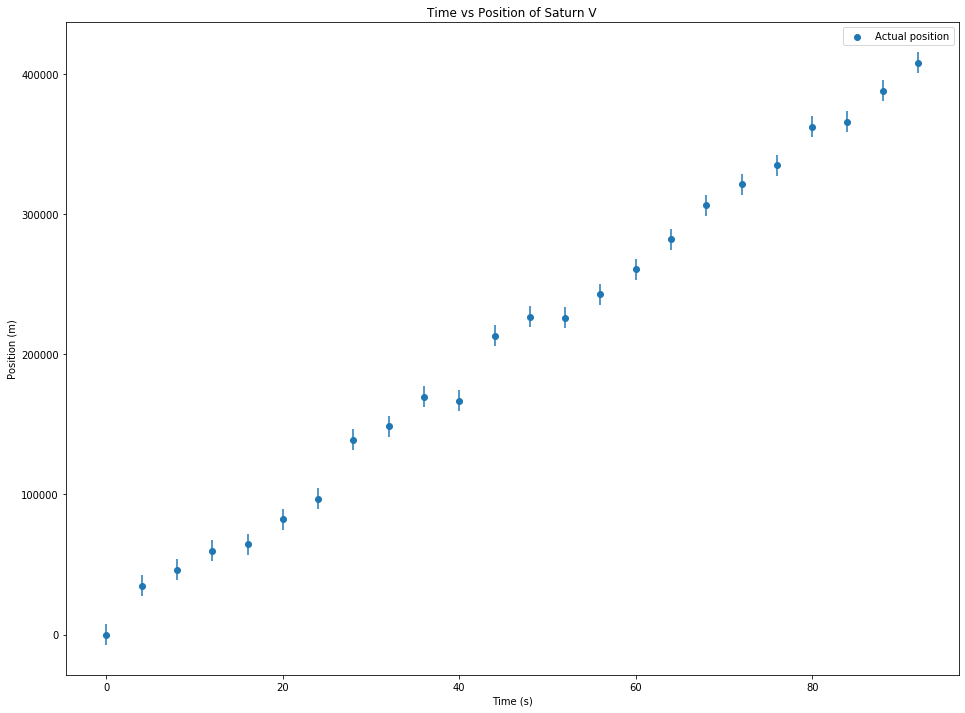

In [4]:
plt.figure(figsize=(16, 12))
plt.scatter(time, position, label='Actual position')
plt.errorbar(time, position, yerr=position_uncertainty, marker='', ls='')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Time vs Position of Saturn V')
plt.legend()
plt.savefig('rocket_plot1.png')

# Question 2

In [5]:
speeds = np.diff(position) / np.diff(time)
print(f'Mean speed: {speeds.mean()} m/s\nStandard error of speed: {stats.sem(speeds)} m/s')

Mean speed: 4434.56260823913 m/s
Standard error of speed: 629.3005178859614 m/s


# Question 3

In [6]:
def linreg(x, y):
    slope = ((x - x.mean()) * (y - y.mean())).sum() / np.square(x - x.mean()).sum()
    intercept = y.mean() - slope * x.mean()
    return slope, intercept

In [7]:
slope, intercept = linreg(time, position)
linregpos = slope * time + intercept

print(f'Linear regression slope: {slope} m/s\nLinear regression intercept: {intercept} m')

Linear regression slope: 4357.412595548586 m/s
Linear regression intercept: 5640.244920890051 m


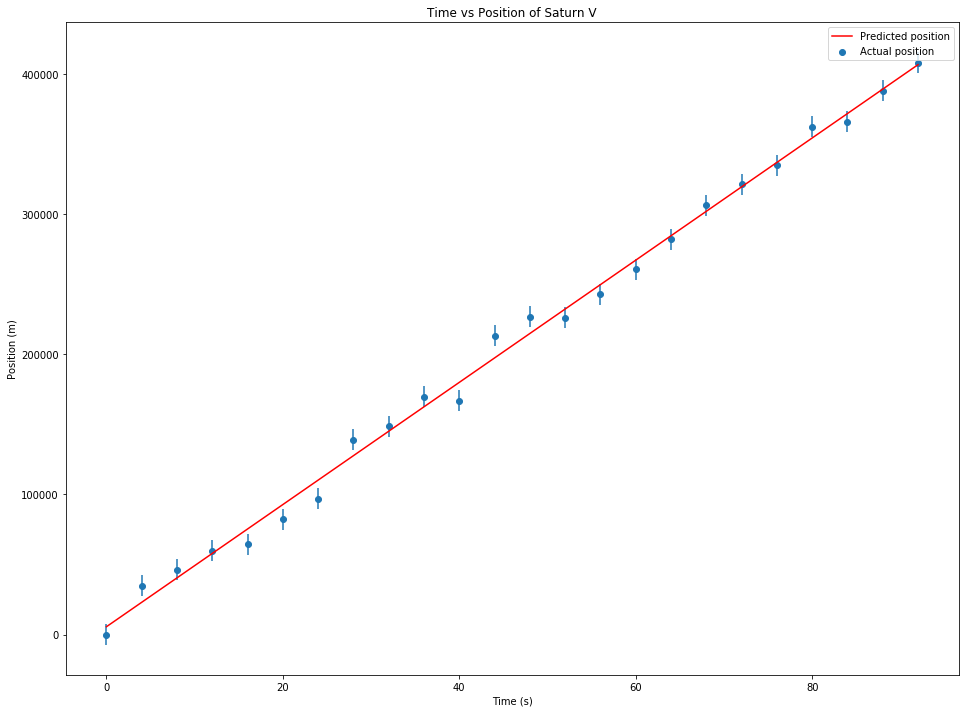

In [8]:
plt.figure(figsize=(16, 12))
plt.scatter(time, position, label='Actual position')
plt.errorbar(time, position, yerr=position_uncertainty, marker='', ls='')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Time vs Position of Saturn V')
plt.plot(time, linregpos, c='r', label='Predicted position')
plt.legend()
plt.savefig('rocket_plot2.png')

# Question 5

In [9]:
# reduced chi squared function

def rcs(pred, target, uncertainty, n_params):
    return np.square((pred - target) / uncertainty).sum() / (pred.size - n_params)

In [10]:
print(f'Reduced chi squared of regression fit: {rcs(linregpos, position, position_uncertainty, 2)}')

Reduced chi squared of regression fit: 1.325014463556978


# Question 6

In [11]:
def fit_func(indep_data, slope, intercept):
    return slope * indep_data + intercept

popt, pcov = curve_fit(f=fit_func, xdata=time, ydata=position, sigma=position_uncertainty, absolute_sigma=True, p0=(4300, 5600))

In [12]:
print(f'curve_fit parameter estimates: {popt[0]} m/s, {popt[1]} m')
print(f'associated uncertainties (standard deviations): {np.sqrt(np.diag(pcov))[0]} m/s, {np.sqrt(np.diag(pcov))[1]} m')
print(f'reduced chi squared of curve_fit fit: {rcs(fit_func(time, popt[0], popt[1]), position, position_uncertainty, 2)}')

curve_fit parameter estimates: 4357.41259520423 m/s, 5640.244942728601 m
associated uncertainties (standard deviations): 55.29074105698729 m/s, 2968.5858218274934 m
reduced chi squared of curve_fit fit: 1.3250144635569776


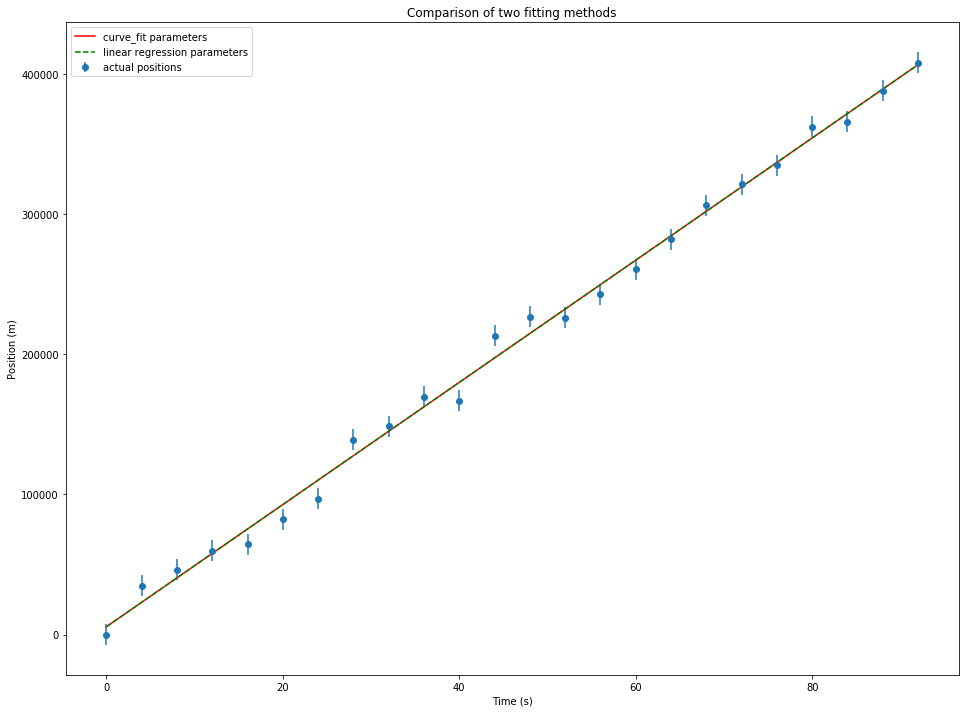

In [13]:
plt.figure(figsize=(16, 12))
plt.errorbar(time, position, yerr=position_uncertainty, marker='o', ls='', label='actual positions')
plt.plot(time, fit_func(time, *popt), c='red', label='curve_fit parameters')
plt.plot(time, fit_func(time, *linreg(time, position)), c='green', linestyle='dashed', label='linear regression parameters')
plt.legend()
plt.title('Comparison of two fitting methods')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.savefig('rocket_plot3.png')

# Question 7

In [15]:
ftime, fposition, funcertainty = np.loadtxt('feather.csv', delimiter=',', skiprows=1, unpack=True)

In [16]:
def pred_feather_pos(time, initpos, initspeed, accel):
    return initpos + initspeed * time + 1/2 * accel * np.square(time)

In [17]:
popt2, pcov2 = curve_fit(f=pred_feather_pos, xdata=ftime, ydata=fposition, sigma=funcertainty, absolute_sigma=True, p0=(1.7, 0, -1/7*9.81))

In [18]:
print(f'curve_fit parameters: {popt2[0]} m, {popt2[1]} m/s, {popt2[2]} m/s^2')
print(f'associated uncertainties: {np.sqrt(np.diag(pcov2))[0]} m, {np.sqrt(np.diag(pcov2))[1]} m/s, {np.sqrt(np.diag(pcov2))[2]} m/s^2')

curve_fit parameters: 1.7872339336201466 m, 0.21428324940445975 m/s, -1.6248389811687276 m/s^2
associated uncertainties: 0.06089164334808638 m, 0.14854806291356756 m/s, 0.15094446194022887 m/s^2


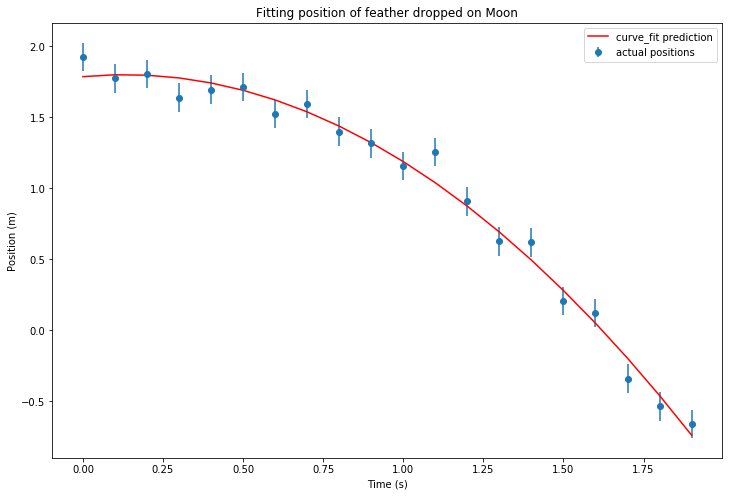

In [19]:
plt.figure(figsize=(12, 8))
plt.errorbar(ftime, fposition, funcertainty, marker='o', ls='', label='actual positions')
plt.plot(ftime, pred_feather_pos(ftime, *popt2), c='r', label='curve_fit prediction')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Fitting position of feather dropped on Moon')
plt.savefig('feather_plot1.png')